In [74]:
import pandas as pd                                                
from ydata_profiling import ProfileReport                          
# from pandas_profiling import ProfileReport
import numpy as np                                                 
import matplotlib.pyplot as plt                                     
import seaborn as sns                                               
%matplotlib inline
import scipy as sp 

In [55]:
url="https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/Shopping_Revenue.csv"
df = pd.read_csv(url)
print(df.head())

   Id  Open Date        City  City Group Type  P1   P2   P3   P4  P5  ...   
0   0  7/17/1999    İstanbul  Big Cities   IL   4  5.0  4.0  4.0   2  ...  \
1   1  2/14/2008      Ankara  Big Cities   FC   4  5.0  4.0  4.0   1  ...   
2   2   3/9/2013  Diyarbakır       Other   IL   2  4.0  2.0  5.0   2  ...   
3   3   2/2/2012       Tokat       Other   IL   6  4.5  6.0  6.0   4  ...   
4   4   5/9/2009   Gaziantep       Other   IL   3  4.0  3.0  4.0   2  ...   

   P29  P30  P31  P32  P33  P34  P35  P36  P37  revenue  
0  3.0    5    3    4    5    5    4    3    4  5653753  
1  3.0    0    0    0    0    0    0    0    0  6923131  
2  3.0    0    0    0    0    0    0    0    0  2055379  
3  7.5   25   12   10    6   18   12   12    6  2675511  
4  3.0    5    1    3    2    3    4    3    3  4316715  

[5 rows x 43 columns]


In [56]:
df.describe()

,Id,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,133.000000,133.000000,137.000000,137.000000,...,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,1.370000e+02
mean,68.000000,4.014599,4.408759,4.317518,4.372263,2.007299,3.323308,5.398496,5.153285,5.445255,...,3.135036,2.729927,1.941606,2.525547,1.138686,2.489051,2.029197,2.211679,1.116788,4.453533e+06
std,39.692569,2.910391,1.514900,1.032337,1.016462,1.209620,2.080024,2.296044,1.858567,1.834793,...,1.680887,5.536647,3.512093,5.230117,1.698540,5.165093,3.436272,4.168211,1.790768,2.576072e+06
min,0.000000,1.000000,1.000000,0.000000,3.000000,1.000000,1.000000,1.000000,1.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.149870e+06
25%,34.000000,2.000000,4.000000,4.000000,4.000000,1.000000,2.000000,5.000000,4.000000,4.000000,...,2.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.999068e+06
50%,68.000000,3.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,5.000000,5.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.939804e+06
75%,102.000000,4.000000,5.000000,5.000000,5.000000,2.000000,4.000000,5.000000,5.000000,5.000000,...,3.000000,4.000000,3.000000,3.000000,2.000000,3.000000,4.000000,3.000000,2.000000,5.166635e+06
max,136.000000,12.000000,7.500000,7.500000,7.500000,8.000000,10.000000,10.000000,10.000000,10.000000,...,7.500000,25.000000,15.000000,25.000000,6.000000,24.000000,15.000000,20.000000,8.000000,1.969694e+07


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 43 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Id          137 non-null    int64  
 1   Open Date   137 non-null    object 
 2   City        137 non-null    object 
 3   City Group  137 non-null    object 
 4   Type        137 non-null    object 
 5   P1          137 non-null    int64  
 6   P2          137 non-null    float64
 7   P3          137 non-null    float64
 8   P4          137 non-null    float64
 9   P5          137 non-null    int64  
 10  P6          133 non-null    float64
 11  P7          133 non-null    float64
 12  P8          137 non-null    int64  
 13  P9          137 non-null    int64  
 14  P10         137 non-null    int64  
 15  P11         137 non-null    int64  
 16  P12         137 non-null    int64  
 17  P13         137 non-null    float64
 18  P14         137 non-null    int64  
 19  P15         137 non-null    i

In [58]:
#Following are the duplicate value
df.duplicated().value_counts()


False    137
Name: count, dtype: int64

In [59]:
#There is no duplicate data found, used to drop duplicates.
df.drop_duplicates(inplace=True)

In [60]:
#To get nulls
df.isnull().sum()

Id            0
Open Date     0
City          0
City Group    0
Type          0
P1            0
P2            0
P3            0
P4            0
P5            0
P6            4
P7            4
P8            0
P9            0
P10           0
P11           0
P12           0
P13           0
P14           0
P15           0
P16           0
P17           0
P18           0
P19           0
P20           0
P21           0
P22           0
P23           0
P24           0
P25           0
P26           0
P27           0
P28           0
P29           0
P30           0
P31           0
P32           0
P33           0
P34           0
P35           0
P36           0
P37           0
revenue       0
dtype: int64

HANDLING MISSING DATA

In [61]:
df['P6'] = df['P6'].fillna(df['P6'].mode()[0])

In [62]:
df['P6'].isna().value_counts(), df['P6'].mode()[0]

(P6
 False    137
 Name: count, dtype: int64,
 2.0)

In [65]:
df['P6'].isna().value_counts(), df['P6'].mode()[0]


(P7
 False    133
 True       4
 Name: count, dtype: int64,
 5.0)

In [67]:
missing_values_count, column_mode = df['P7'].isna().value_counts(), df['P6'].mode()[0]

In [66]:
df['P7'].isna().value_counts(), df['P7'].mode()[0]

(P7
 False    133
 True       4
 Name: count, dtype: int64,
 5.0)

In [68]:
df['P7'] = df['P7'].fillna(df['P7'].mode()[0])

In [69]:
df['P7'].isna().value_counts(), df['P7'].mode()[0]

(P7
 False    137
 Name: count, dtype: int64,
 5.0)

In [75]:
profile = ProfileReport(df, title="Shopping Sales")


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\Gajanan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\interactiveshell.py", line 3508, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Gajanan\AppData\Local\Temp\ipykernel_30488\78922928.py", line 1, in <module>
    profile.to_file("Shopping.html")
  File "C:\Users\Gajanan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\typeguard\__init__.py", line 1033, in wrapper
    retval = func(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Gajanan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\ydata_profiling\profile_report.py", line 350, in to_file
    data = self.to_html()
           ^^^^^^^^^^^^^^
  File "C:\Users\Gajanan\AppData\Local\Packages\Py

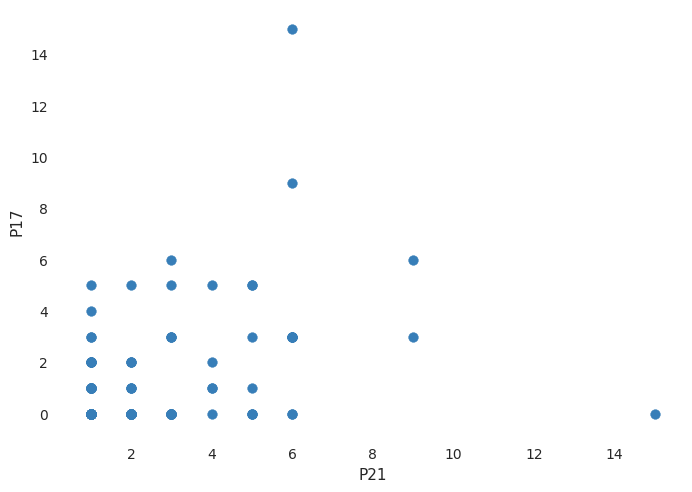

In [77]:
profile.to_file("Shopping.html")

DATA VISUALIZATION

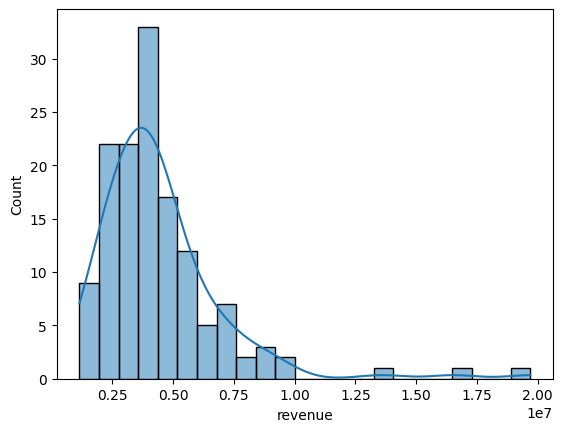

In [78]:
sns.histplot(df['revenue'], kde=True)
plt.show()

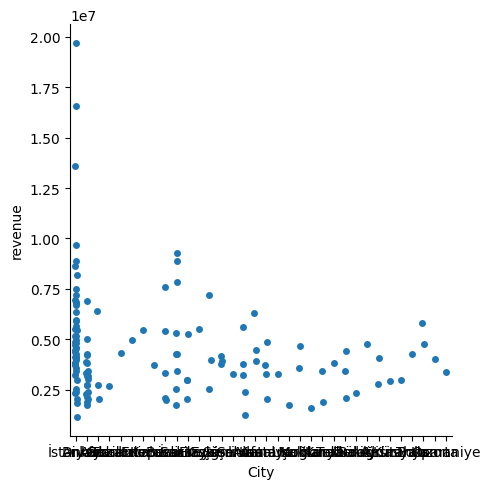

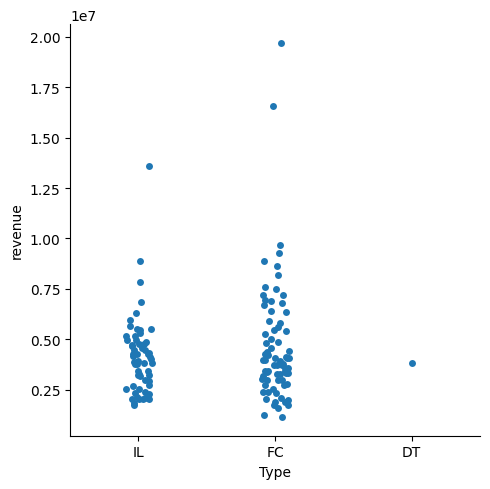

In [79]:
# Relationship between the CATEGORICAL COLUMN and the TARGET VARIABLE
cat_cols = ['City', 'Type']
for col in cat_cols:
    sns.catplot(x=col, y='revenue', data=df)
    plt.show()

In [80]:
#  Print column names
print(df.columns.tolist())

['Id', 'Open Date', 'City', 'City Group', 'Type', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26', 'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35', 'P36', 'P37', 'revenue']


In [81]:
X = df[['Id', 'Open Date', 'City', 'City Group', 'Type', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26', 'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35', 'P36', 'P37']]
y = df['revenue']

In [86]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4) 


In [85]:
X_test

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
36,36,5/9/2008,Ankara,Big Cities,FC,3,5.0,5.0,3.0,1,...,3.0,3.0,0,0,0,0,0,0,0,0
45,45,2/2/2012,Antalya,Other,FC,6,6.0,6.0,4.5,2,...,5.0,7.5,0,0,0,0,0,0,0,0
108,108,7/9/2012,Muğla,Other,FC,1,2.0,5.0,4.0,1,...,2.0,3.0,0,0,0,0,0,0,0,0
111,111,8/10/2012,Kütahya,Other,FC,2,3.0,4.0,4.0,2,...,2.0,3.0,0,0,0,0,0,0,0,0
96,96,11/27/2011,Diyarbakır,Other,FC,4,5.0,2.0,4.0,2,...,2.0,2.0,0,0,0,0,0,0,0,0
65,65,12/21/2013,İzmir,Big Cities,FC,3,5.0,4.0,3.0,1,...,1.0,3.0,0,0,0,0,0,0,0,0
84,84,10/9/2009,İzmir,Big Cities,IL,4,4.0,5.0,3.0,1,...,2.0,3.0,4,3,3,2,4,4,3,1
15,15,2/7/2012,İstanbul,Big Cities,IL,12,7.5,6.0,6.0,2,...,7.5,7.5,5,15,20,2,12,3,16,4
31,31,12/31/2012,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,1,...,2.0,3.0,4,3,3,2,3,4,3,3
19,19,8/16/2011,Sakarya,Other,IL,2,4.0,4.0,4.0,2,...,2.0,3.0,0,0,0,0,0,0,0,0


In [83]:
X_train

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
34,34,3/21/2012,İstanbul,Big Cities,FC,4,5.0,4.0,4.0,1,...,4.0,3.0,0,0,0,0,0,0,0,0
73,73,10/4/2011,Ankara,Big Cities,FC,4,5.0,4.0,5.0,2,...,5.0,0.0,0,0,0,0,0,0,0,0
68,68,3/16/2010,İstanbul,Big Cities,IL,2,4.0,3.0,4.0,2,...,2.0,3.0,5,5,5,4,4,4,3,4
49,49,4/1/2008,İstanbul,Big Cities,FC,12,7.5,6.0,6.0,2,...,7.5,7.5,0,0,0,0,0,0,0,0
92,92,11/1/2002,İstanbul,Big Cities,FC,12,7.5,7.5,6.0,2,...,10.0,7.5,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,82,2/23/2010,Karabük,Other,FC,2,2.0,4.0,3.0,2,...,2.0,3.0,0,0,0,0,0,0,0,0
62,62,11/15/2010,Sakarya,Other,FC,2,4.0,4.0,4.0,2,...,2.0,3.0,1,1,3,2,3,1,3,3
134,134,7/8/2006,Kayseri,Other,FC,3,4.0,4.0,4.0,2,...,2.0,3.0,0,0,0,0,0,0,0,0
119,119,1/3/2014,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,2.0,3.0,0,0,0,0,0,0,0,0


In [87]:
y_test

119    3780019
29     3447890
48     7201784
128    2383840
10     3745135
24     8904084
133    9262754
23     2999068
51     3273041
11     5161370
66     1882131
79     6313221
40     6836483
94     3753720
46     4250758
118    1847826
25     3778621
37     2740687
108    3570392
111    2993069
90     3426169
98     2344689
132    5787594
92     6782425
0      5653753
3      2675511
12     1734634
60     3164972
122    4286645
39     3818055
80     3727364
126    4015749
100    9652350
106    4888774
58     3004429
62     5286212
42     4952255
121    3445076
93     3410878
95     1270499
84     4250553
64     2551252
35     3903884
112    3784230
113    2097022
77     1904842
131    3199619
4      4316715
105    2792031
87     5906596
117    2018785
45     3752885
65     1756069
20     5525735
56     2390534
Name: revenue, dtype: int64

In [88]:
y_train

32     3261924
68     3836721
88     2025297
102    2738052
49     8630682
        ...   
30     3008199
28     4705945
136    6363241
129    3939804
74     5500818
Name: revenue, Length: 82, dtype: int64

In [90]:
# Split the data betweenindependent and dependent variables  
X = df.drop('revenue', axis=1)  
y = df['revenue']  
print(f"Independent variable shape: {X.shape}")
print(f"Dependent variable shape: {y.shape}")

Independent variable shape: (137, 42)
Dependent variable shape: (137,)


In [92]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor



X = df.drop(['Id','Open Date','City','City Group','Type','revenue'], axis=1)  
models = [
    LinearRegression(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    KNeighborsRegressor()
]

best_model = RandomForestRegressor()


best_model.fit(X, y)

for model in models:
    scores = cross_val_score(model, X, y, cv=5)
    print(f"{type(model).__name__} score: {scores.mean()}")



LinearRegression score: -1.5676283231469992
DecisionTreeRegressor score: -0.9526416575538408
RandomForestRegressor score: -0.18864313553778378
KNeighborsRegressor score: -0.10121917789939794


In [93]:
RandomForestRegressor()

RandomForestRegressor()

In [94]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

X = df.drop(['Id','Open Date','City','City Group','Type','revenue'], axis=1)  # independent 
y = df['revenue']  # dependent 

selector = SelectKBest(score_func=f_regression, k=5)
X_new = selector.fit_transform(X, y)

selected_features = df.columns[selector.get_support(indices=True)].tolist()

print(f"Selected features: {selected_features}")

Selected features: ['Open Date', 'P1', 'P8', 'P23', 'P24']
